<a href="https://colab.research.google.com/github/AshutoshLembhe/Machine-Learning-with-Python-Basics/blob/master/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 1.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=d45e1cf64b97cf3220bd118c6fd96625e2e08e1f0a84601f03d38b38181fbdfc
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import pandas as pd

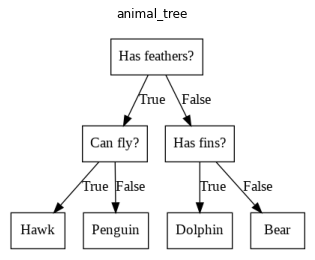

In [ ]:
mglearn.plots.plot_animal_tree()
plt.suptitle("animal_tree");

In [ ]:
#we can make the machine learn by doing supervise learning

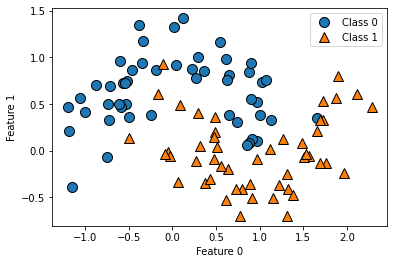

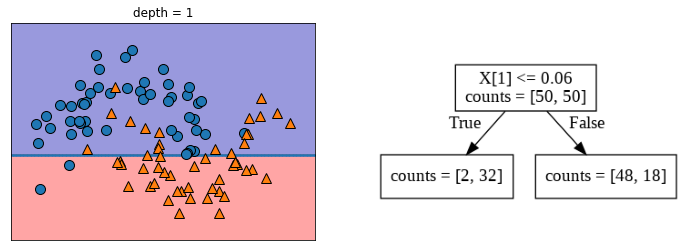

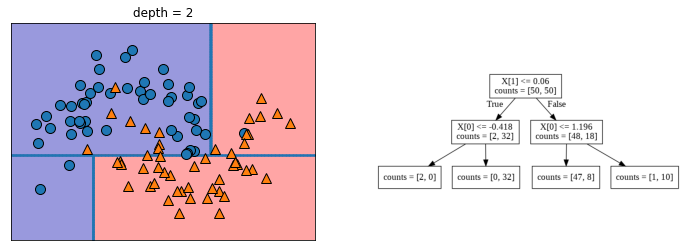

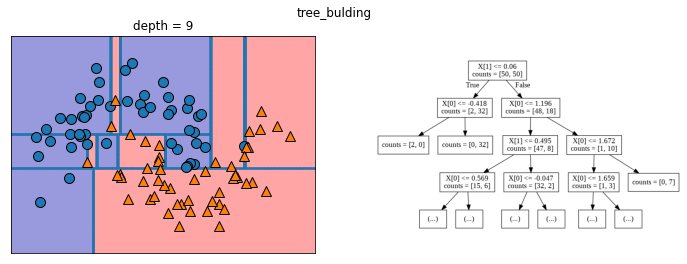

In [7]:
mglearn.plots.plot_tree_progressive()
plt.suptitle("tree_bulding");

In [8]:
#performing decision tree on breast cancer data set

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set:%f"%tree.score(X_train,y_train))
print("Accuracy on test set:%f"%tree.score(X_test,y_test))

Accuracy on training set:1.000000
Accuracy on test set:0.937063


In [11]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
#depth means only upto 4 levels of branching
tree.fit(X_train,y_train)
print("Accuracy on training set:%f"%tree.score(X_train,y_train))
print("Accuracy on test set:%f"%tree.score(X_test,y_test))
#reducing tree depth lowers overfitting but lowers training accuracy but increases test accuracy

Accuracy on training set:0.988263
Accuracy on test set:0.951049


In [14]:
#Analyzing Decision Trees
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="mytree.dot",class_names=["malignant","bengin"],feature_names=cancer.feature_names,impurity=False,filled=True)

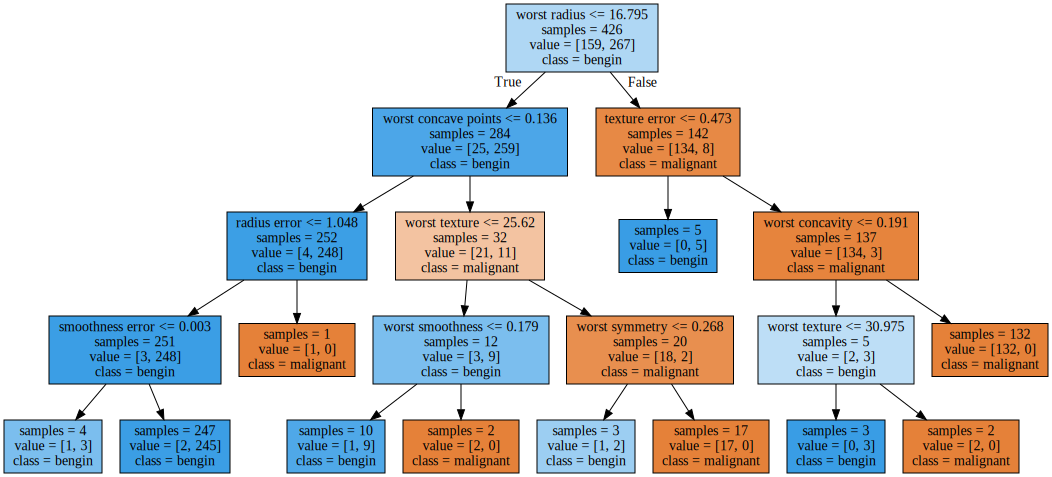

In [18]:
#syntax for reading the graphviz module. This one is new to me.
with open("mytree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

In [19]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

(0.0, 1.0)

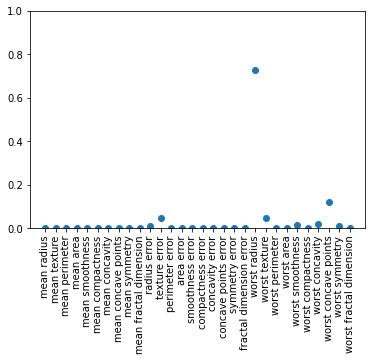

In [20]:
plt.plot(tree.feature_importances_,'o')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.ylim(0,1)